In [33]:
pip install pandas


Note: you may need to restart the kernel to use updated packages.


In [34]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [35]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 2.8 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install math

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:

csv_file_path = '/home/michele/Desktop/Tirocinio_giusto/Tirocinio/post_seconda_revisione/dati.csv'
csv_file_path1 = '/home/michele/Desktop/Tirocinio_giusto/Tirocinio/post_seconda_revisione/dati_ottimizzato.csv'
csv_file_path5 = '/home/michele/Desktop/Tirocinio_giusto/Tirocinio/post_seconda_revisione/dati_differences_upd2.csv'
#file below ("..._1") have fixed q (127) and variable matrix dimensionss
csv_file_path7 = '/home/michele/Desktop/Tirocinio_giusto/Tirocinio/post_seconda_revisione/dati_differences_upd_only_count_ord_final_1.csv'
csv_file_path8 = '/home/michele/Desktop/Tirocinio_giusto/Tirocinio/post_terza_revisione/dati.csv'
csv_file_path9 = '/home/michele/Desktop/Tirocinio_giusto/Tirocinio/post_uarta_revisione/dati_cf_4_5(2).csv'
csv_file_path10 = '/home/michele/Desktop/Tirocinio_giusto/Tirocinio/post_uarta_revisione/dati_345.csv'
#with 11 col add iteration are 23132; with 12 col add iteration are 23178
csv_file_path11 = '/home/michele/Desktop/Tirocinio_giusto/Tirocinio/post_uarta_revisione/dati_5_opt&noOpt.csv'
csv_file_path12 = '/home/michele/Desktop/Tirocinio_giusto/Tirocinio/post_uarta_revisione/dati_345_n_fixed.csv'

df = pd.read_csv(csv_file_path)
df1 = pd.read_csv(csv_file_path1)
df5 = pd.read_csv(csv_file_path5)
df7 = pd.read_csv(csv_file_path7)
df8 = pd.read_csv(csv_file_path8)
df9 = pd.read_csv(csv_file_path9)
df10 = pd.read_csv(csv_file_path10)
df11 = pd.read_csv(csv_file_path11)
df12 = pd.read_csv(csv_file_path12)

print(df)
print(df1)
print(df5)
print(df7)

      File  Iteration  Max_columns  Duration_w_all_Columns  \
0        4          0           11                0.999672   
1        4          1           11                0.889635   
2        4          2           11                0.905284   
3        4          3           11                1.101511   
4        4          4           11               26.689489   
...    ...        ...          ...                     ...   
2369     4        195           11                1.577355   
2370     4        196           11                1.461752   
2371     4        197           11                1.528695   
2372     4        198           11                4.713854   
2373     4        199           11                2.691335   

      Duration_w_max_columns  Num_op_w_all_columns  Num_op_w_max_columns  
0                   2.386908                     0                     0  
1                   0.834656                     0                     0  
2                   0.758730  

In [3]:
df_appended = pd.concat([df, df1], ignore_index=True)
print(df_appended)

      File  Iteration  Max_columns  Duration_w_all_Columns  \
0        4          0           11                0.999672   
1        4          1           11                0.889635   
2        4          2           11                0.905284   
3        4          3           11                1.101511   
4        4          4           11               26.689489   
...    ...        ...          ...                     ...   
6369     1        995           12               21.772236   
6370     1        996           12               22.634726   
6371     1        997           12               20.197403   
6372     1        998           12               20.101791   
6373     1        999           12               25.202164   

      Duration_w_max_columns  Num_op_w_all_columns  Num_op_w_max_columns  
0                   2.386908                     0                     0  
1                   0.834656                     0                     0  
2                   0.758730  

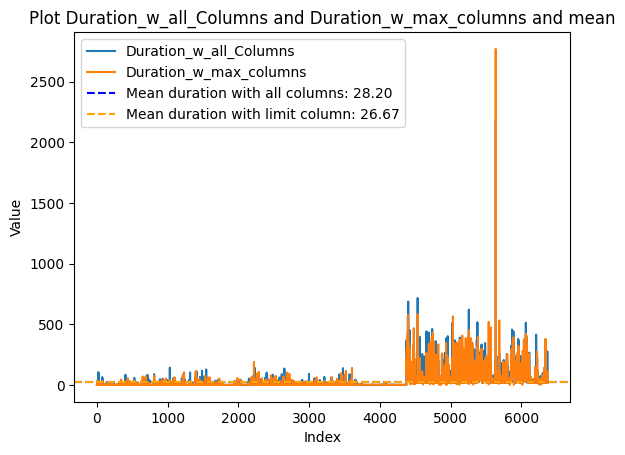

In [4]:
#lascia il tempo che trova
mean_w_all_cols = df_appended['Duration_w_all_Columns'].mean()
mean_w_max_cols = df_appended['Duration_w_max_columns'].mean()

plt.plot(df_appended.index, df_appended['Duration_w_all_Columns'], label='Duration_w_all_Columns')
plt.plot(df_appended.index, df_appended['Duration_w_max_columns'], label='Duration_w_max_columns')

plt.axhline(y=mean_w_all_cols, color='blue', linestyle='--', label=f'Mean duration with all columns: {mean_w_all_cols:.2f}')
plt.axhline(y=mean_w_max_cols, color='orange', linestyle='--', label=f'Mean duration with limit column: {mean_w_max_cols:.2f}')

plt.title('Plot Duration_w_all_Columns and Duration_w_max_columns and mean')
plt.legend()
plt.xlabel('Index')
plt.ylabel('Value')

plt.show()

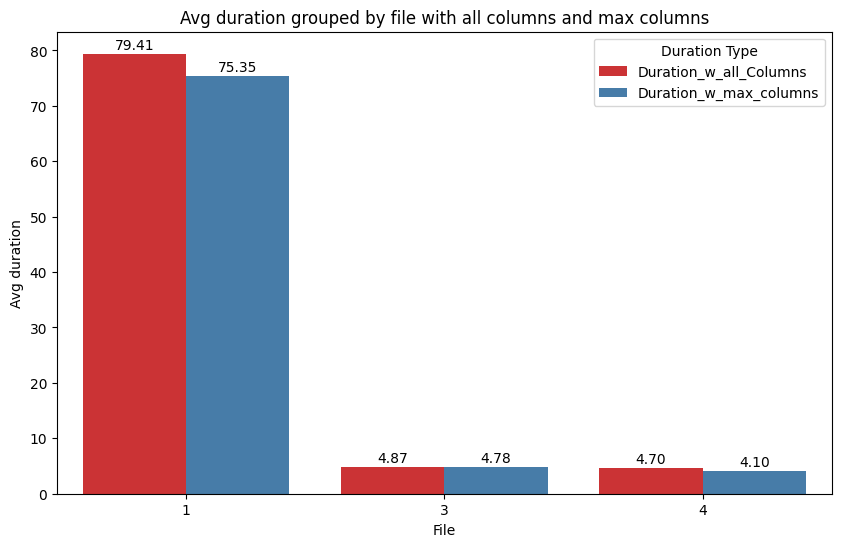

In [5]:
#NON HA SENSO METTERE PURE IL FILE 5 POICHÈ È UN'ALTRA FC --> NON È UN OTTIMIZZAZIONE E QUINDI NON MI SERVE IL CONFRONTO
#there are method 1 is with compare; file 3 is native, file 4 is optimization of file 3
grouped_means = df_appended.groupby('File').agg({
    'Duration_w_all_Columns': 'mean',
    'Duration_w_max_columns': 'mean'
}).reset_index()

grouped_means_melted = grouped_means.melt(id_vars='File', 
                                          value_vars=['Duration_w_all_Columns', 'Duration_w_max_columns'], 
                                          var_name='Durata_Type', value_name='Mean')

plt.figure(figsize=(10, 6))

ax = sns.barplot(data=grouped_means_melted, x='File', y='Mean', hue='Durata_Type', palette='Set1')
plt.title('Avg duration grouped by file with all columns and max columns')
plt.xlabel('File')
plt.ylabel('Avg duration')

plt.legend(title='Duration Type')

for p in ax.patches:
    if p.get_height() > 0:
        ax.annotate(format(p.get_height(), '.2f'), 
                        (p.get_x() + p.get_width() / 2., p.get_height()), 
                        ha='center', va='bottom', 
                        fontsize=10, color='black', 
                        xytext=(0, 1), 
                        textcoords='offset points')

plt.show()

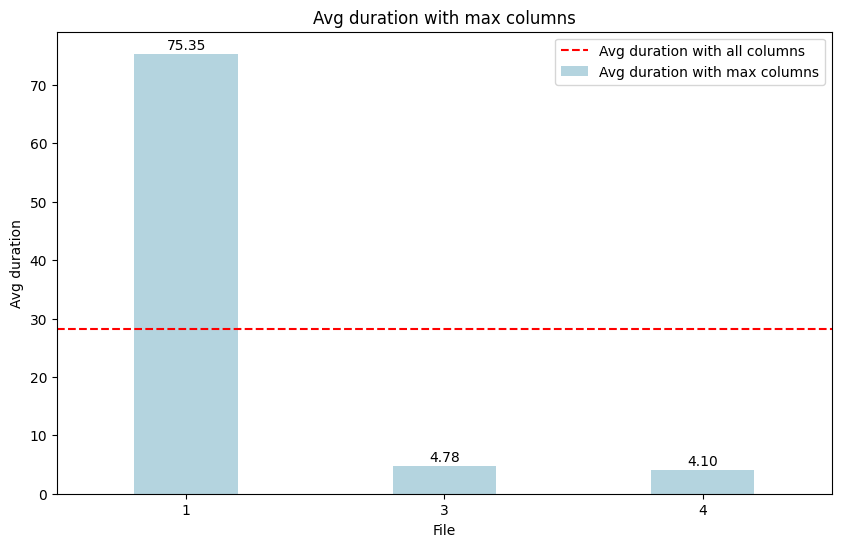

In [6]:
mean_w_all_cols = df_appended['Duration_w_all_Columns'].mean()

grouped_means = df_appended.groupby('File').agg({
    'Duration_w_max_columns': 'mean'
}).reset_index()

grouped_means['Mean_Global'] = mean_w_all_cols

plt.figure(figsize=(10, 6))
plt.axhline(y=mean_w_all_cols, color='red', linestyle='--', label='Avg duration with all columns')
barplot = sns.barplot(data=grouped_means, x='File', y='Duration_w_max_columns', color='lightblue', width=0.4, label='Avg duration with max columns')

plt.title('Avg duration with max columns')
plt.xlabel('File')
plt.ylabel('Avg duration')
plt.xticks(ticks=range(len(grouped_means)), labels=grouped_means['File'], rotation=0)  # Modifica rotation se necessarioplt.legend()
plt.legend(loc='upper right')

for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.2f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha='center', va='bottom', 
                     fontsize=10, color='black', 
                     xytext=(0, 1), 
                     textcoords='offset points')

plt.show()

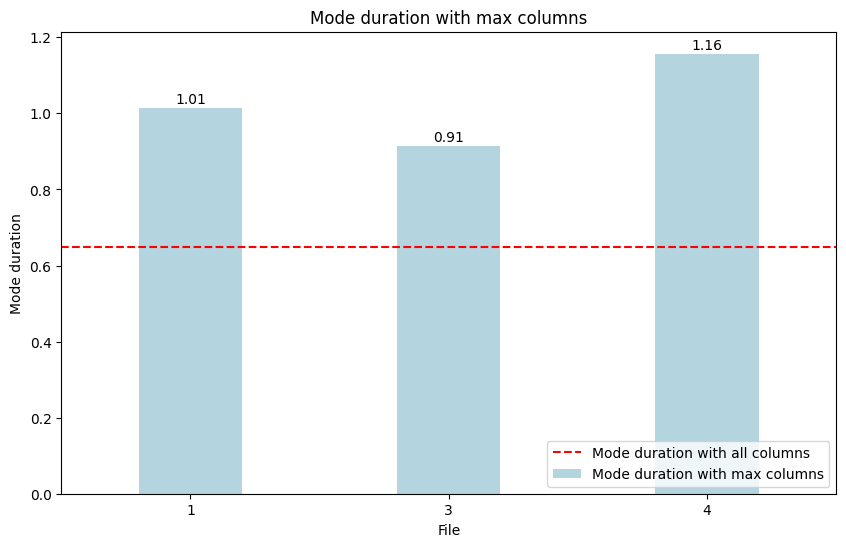

In [7]:
mode_w_all_cols = df_appended['Duration_w_all_Columns'].mode().iloc[0] if not df_appended['Duration_w_all_Columns'].mode().empty else None

grouped_modes = df_appended.groupby('File').agg({
    'Duration_w_max_columns': lambda x: x.mode().iloc[0] if not x.mode().empty else None
}).reset_index()

grouped_modes['Mode_Global'] = mode_w_all_cols

plt.figure(figsize=(10, 6))

plt.axhline(y=mode_w_all_cols, color='red', linestyle='--', label='Mode duration with all columns')
barplot = sns.barplot(data=grouped_modes, x='File', y='Duration_w_max_columns', color='lightblue', width=0.4, label='Mode duration with max columns')
plt.title('Mode duration with max columns')
plt.xlabel('File')
plt.ylabel('Mode duration')
plt.xticks(ticks=range(len(grouped_modes)), labels=grouped_modes['File'], rotation=0)

plt.legend(loc='lower right')

for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.2f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha='center', va='bottom', 
                     fontsize=10, color='black', 
                     xytext=(0, 1), 
                     textcoords='offset points')

plt.show()


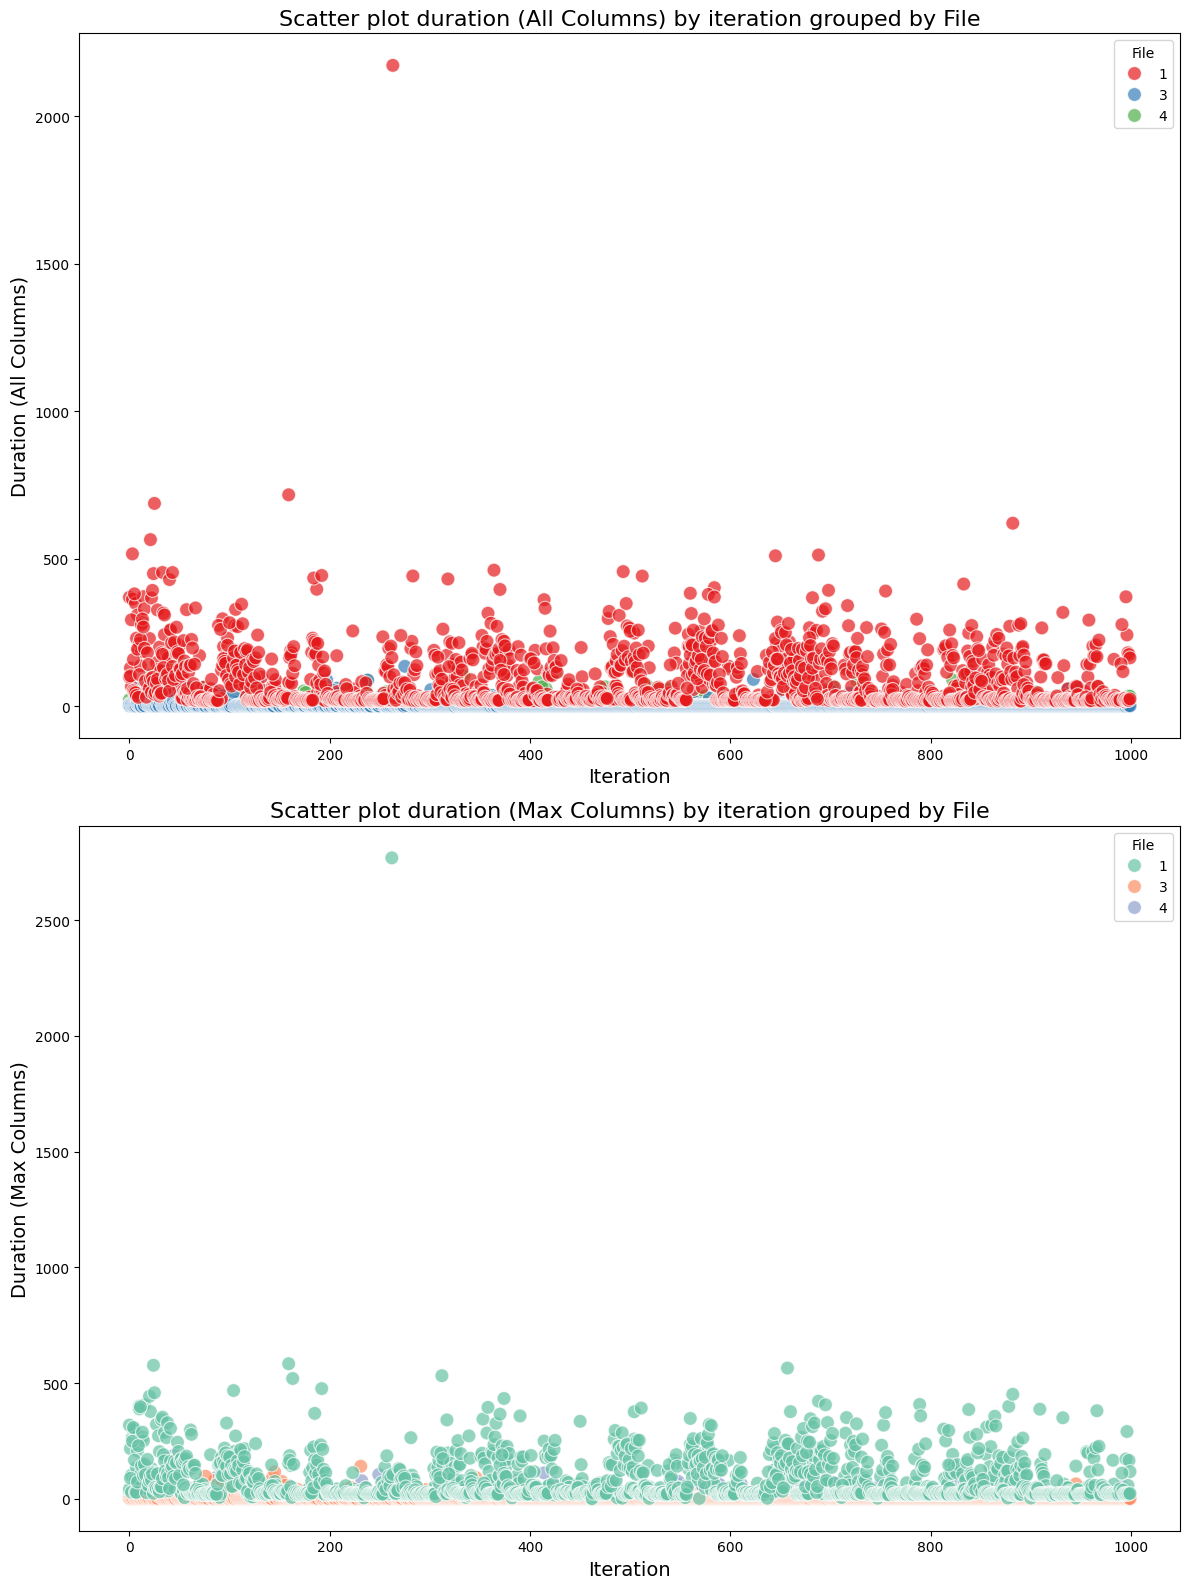

In [8]:
#2 rows 1 column
fig, ax = plt.subplots(2, 1, figsize=(12, 16))  

#scatter plot Duration_w_all_Columns
sns.scatterplot(data=df_appended, x='Iteration', y='Duration_w_all_Columns', hue='File', palette='Set1', s=100, alpha=0.7, ax=ax[0])
ax[0].set_title('Scatter plot duration (All Columns) by iteration grouped by File', fontsize=16)
ax[0].set_xlabel('Iteration', fontsize=14)
ax[0].set_ylabel('Duration (All Columns)', fontsize=14)

#scatter plot Duration_w_max_columns
sns.scatterplot(data=df_appended, x='Iteration', y='Duration_w_max_columns', hue='File', palette='Set2', s=100, alpha=0.7, ax=ax[1])
ax[1].set_title('Scatter plot duration (Max Columns) by iteration grouped by File', fontsize=16)
ax[1].set_xlabel('Iteration', fontsize=14)
ax[1].set_ylabel('Duration (Max Columns)', fontsize=14)

plt.legend(title='File')
plt.tight_layout()
plt.show()


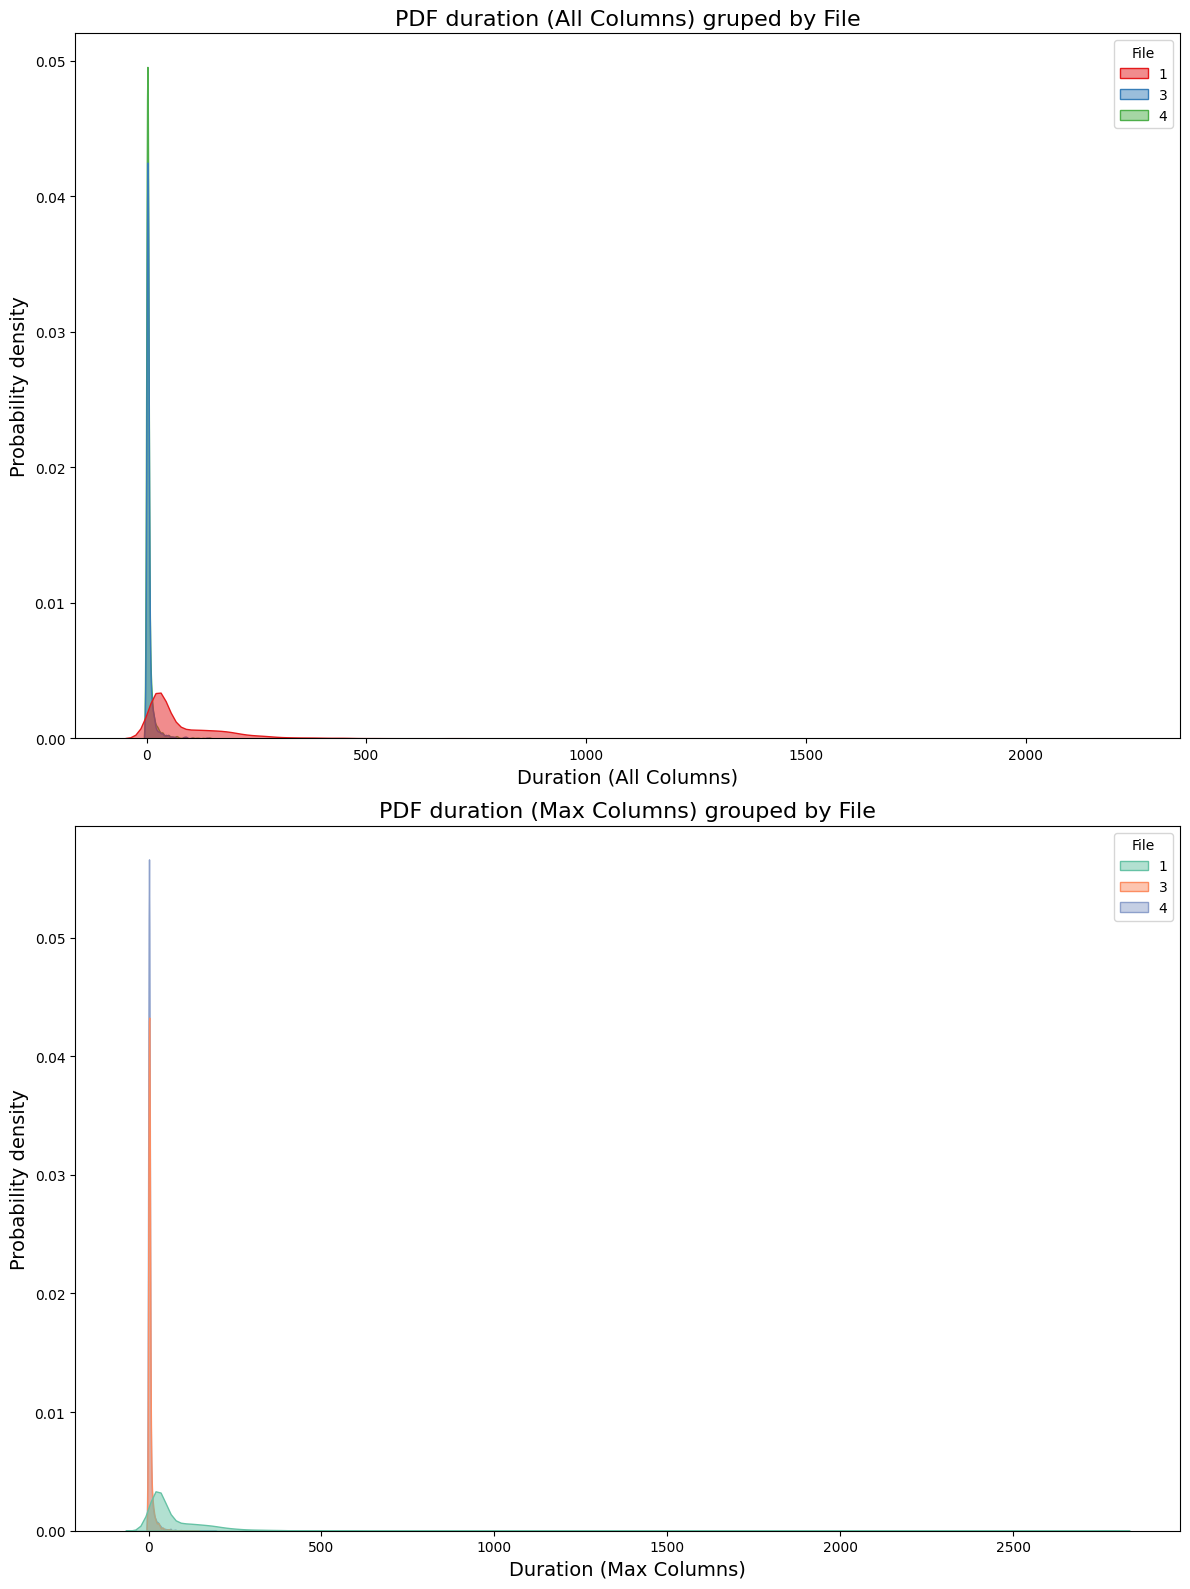

In [9]:
fig, ax = plt.subplots(2, 1, figsize=(12, 16)) 

#PDF Duration_w_all_Columns grouped by File
sns.kdeplot(data=df_appended, x='Duration_w_all_Columns', hue='File', fill=True, palette='Set1', alpha=0.5, ax=ax[0])
ax[0].set_title('PDF duration (All Columns) gruped by File', fontsize=16)
ax[0].set_xlabel('Duration (All Columns)', fontsize=14)
ax[0].set_ylabel('Probability density', fontsize=14)

#PDF Duration_w_max_columns grouped by File
sns.kdeplot(data=df_appended, x='Duration_w_max_columns', hue='File', fill=True, palette='Set2', alpha=0.5, ax=ax[1])
ax[1].set_title('PDF duration (Max Columns) grouped by File', fontsize=16)
ax[1].set_xlabel('Duration (Max Columns)', fontsize=14)
ax[1].set_ylabel('Probability density', fontsize=14)

plt.tight_layout()
plt.show()


     Round  Duration_w_all_Columns_3  Duration_w_all_Columns_4  \
0       53                  0.510846                  0.510496   
1       56                  0.643970                  0.523091   
2       57                  0.948215                  0.741871   
3       58                  0.485480                  0.381437   
4       59                  0.499438                  0.392053   
..     ...                       ...                       ...   
190    245                  6.380099                  3.508125   
191    246                  5.643203                  3.265441   
192    247                 12.788397                  8.410988   
193    248                  7.954056                  4.792009   
194    249                  7.504264                  4.287904   

     Duration_w_max_columns_3  Duration_w_max_columns_4  
0                    0.474126                  0.413802  
1                    0.685867                  0.535652  
2                    1.003906    

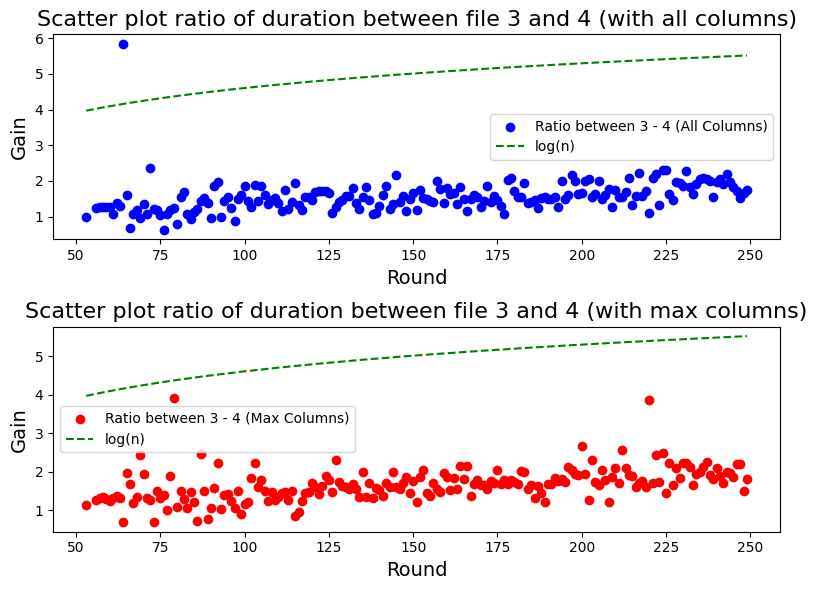

In [10]:
#there compute the mean with max and all columns grouped by round and file. Unstack: breaking down column "#file" into 
#4 columns (mean file 3 all columns.... mean file 4 max columns).
#reset_index returns the "Round" column as a normal column and not as an index
grouped_means = df7.groupby(['Round', 'File'])[['Duration_w_all_Columns', 'Duration_w_max_columns']].mean().unstack().reset_index()
grouped_means.columns = ['Round', 'Duration_w_all_Columns_3', 'Duration_w_all_Columns_4', 
                         'Duration_w_max_columns_3', 'Duration_w_max_columns_4']

print(grouped_means)
grouped_means['ratio_3_4_all_columns'] = grouped_means['Duration_w_all_Columns_3']/grouped_means['Duration_w_all_Columns_4']
grouped_means['ratio_3_4_max_columns'] = grouped_means['Duration_w_max_columns_3']/grouped_means['Duration_w_max_columns_4']

X_all = grouped_means['Round'].values
y_all = grouped_means['ratio_3_4_all_columns'].values

X_max = grouped_means['Round'].values
y_max = grouped_means['ratio_3_4_max_columns'].values

complex_curve_file3 = X_all**2 * np.log(X_all)
complex_curve_file4 = X_all**2
#complex curve with max columns is similar
log_curve_all = np.log(X_all)
log_curve_max = np.log(X_max)

fig, ax = plt.subplots(2, 1, figsize=(8, 6)) 

ax[0].scatter(X_all, y_all, color='b', label='Ratio between 3 - 4 (All Columns)')
ax[0].plot(X_all, log_curve_all, color='g', linestyle='--', label=r'log(n)')
ax[0].set_title('Scatter plot ratio of duration between file 3 and 4 (with all columns)', fontsize=16)
ax[0].set_xlabel('Round', fontsize=14)
ax[0].set_ylabel('Gain', fontsize=14)
ax[0].legend()


ax[1].scatter(X_max, y_max, color='r', label='Ratio between 3 - 4 (Max Columns)')
ax[1].plot(X_max, log_curve_max, color='g', linestyle='--', label=r'log(n)')
ax[1].set_title('Scatter plot ratio of duration between file 3 and 4 (with max columns)', fontsize=16)
ax[1].set_xlabel('Round', fontsize=14)
ax[1].set_ylabel('Gain', fontsize=14)
ax[1].legend()

plt.tight_layout()
plt.show()


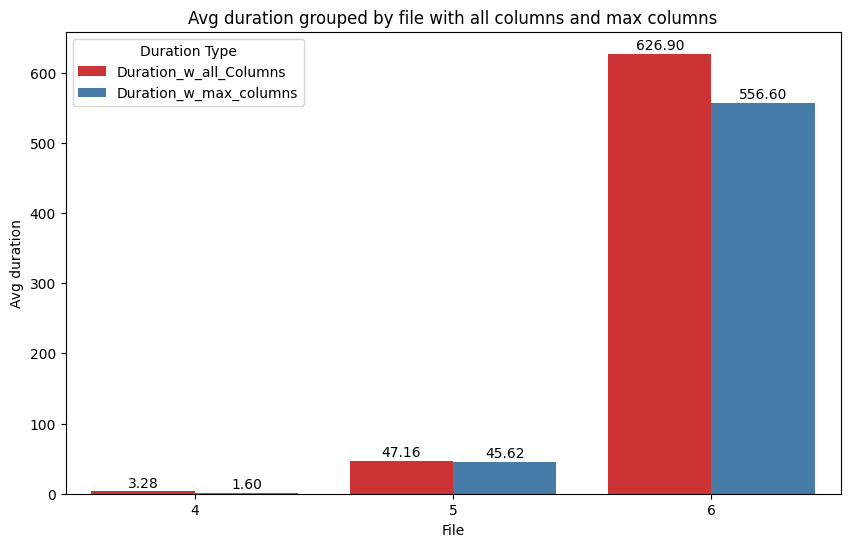

In [11]:
#try to compare 3 canonic form: file 3, 4, 5, 6. File 3 is native fc, file 4 is optimization of 3 with count frequence
#file 5 is cf 4.4 and file 6 is cf 5.5
#df_appended = pd.concat([df, df1], ignore_index=True)
grouped_means = df10.groupby('File').agg({
    'Duration_w_all_Columns': 'mean',
    'Duration_w_max_columns': 'mean'
}).reset_index()

grouped_means_melted = grouped_means.melt(id_vars='File', 
                                          value_vars=['Duration_w_all_Columns', 'Duration_w_max_columns'], 
                                          var_name='Durata_Type', value_name='Mean')

plt.figure(figsize=(10, 6))

ax = sns.barplot(data=grouped_means_melted, x='File', y='Mean', hue='Durata_Type', palette='Set1')
plt.title('Avg duration grouped by file with all columns and max columns')
plt.xlabel('File')
plt.ylabel('Avg duration')

plt.legend(title='Duration Type')

for p in ax.patches:
    if p.get_height() > 0:
        ax.annotate(format(p.get_height(), '.2f'), 
                        (p.get_x() + p.get_width() / 2., p.get_height()), 
                        ha='center', va='bottom', 
                        fontsize=10, color='black', 
                        xytext=(0, 1), 
                        textcoords='offset points')

plt.show()

   level_0  index  File  Iteration  Max_columns  Number of error
0        0   2145     4        499           11               11
1        1   2146     5        499           11               15
2        2   2147     6        499           11              399
3        0   3639     4        499           12                3
4        1   3640     5        499           12                1
5        2   3641     6        499           12              138
   level_0  index  File  Iteration  Max_columns  Number of error  Successes
0        0   2145     4        499           11               11  97.800000
1        1   2146     5        499           11               15  97.000000
2        2   2147     6        499           11              399  99.914523
3        0   3639     4        499           12                3  99.400000
4        1   3640     5        499           12                1  99.800000
5        2   3641     6        499           12              138  99.694231


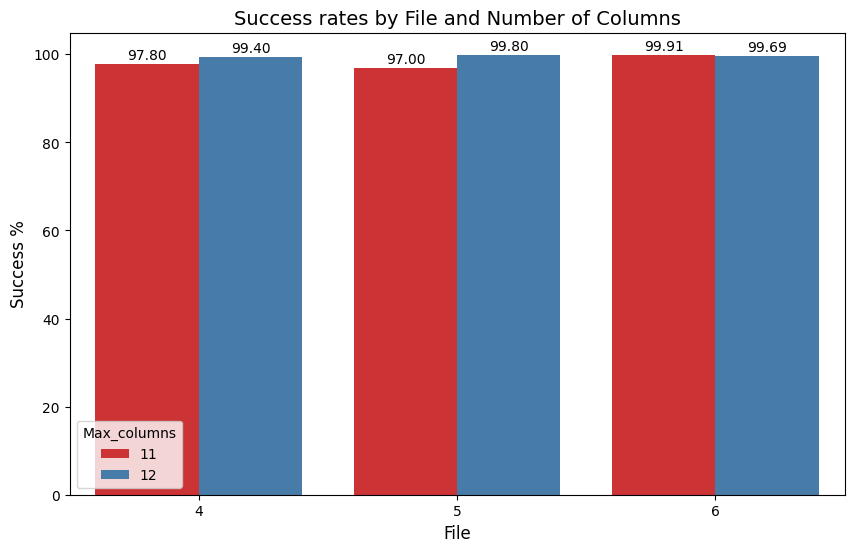

In [12]:
#there insert the graph with % good

#QUA CAMBIA IL DF. DEVO PRENDERE LE ULTIME 3 RIGHE SOLO LA COLONNA FILE MAX COLUMNS E NUMBER OF ERRORS
perc_good11 = df10.iloc[2145:2148,[0,1,2,7]].reset_index()
#print(perc_good11)
perc_good12 = df10.iloc[-3:,[0,1,2,7]].reset_index()
#print(perc_good12)
perc_good = pd.concat([perc_good11,perc_good12]).reset_index()
#print(perc_good)

#with 11 col add iteration are 23132; with 12 col add iteration are 23178
print(perc_good)
perc_good['Successes'] = (500 - perc_good['Number of error'])/500*100
perc_good.iloc[2, -1] = (500 + 23132 - perc_good.iloc[2, -1]) / (500 + 23132)*100
perc_good.iloc[-1, -1] = (500 + 23178 - perc_good.iloc[-1, -1]) / (500 + 23178)*100
print(perc_good)

grouped = perc_good.groupby(['File', 'Max_columns'])['Successes'].sum().reset_index()

plt.figure(figsize=(10, 6))
ax = sns.barplot(data=grouped, x='File', y='Successes', hue='Max_columns', palette='Set1')

plt.title('Success rates by File and Number of Columns', fontsize=14)
plt.xlabel('File', fontsize=12)
plt.ylabel('Success %', fontsize=12)
plt.legend(title='Max_columns')

for p in ax.patches:
    if p.get_height() > 0:
        ax.annotate(format(p.get_height(), '.2f'), 
                        (p.get_x() + p.get_width() / 2., p.get_height()), 
                        ha='center', va='bottom', 
                        fontsize=10, color='black', 
                        xytext=(0, 1), 
                        textcoords='offset points')
plt.show()

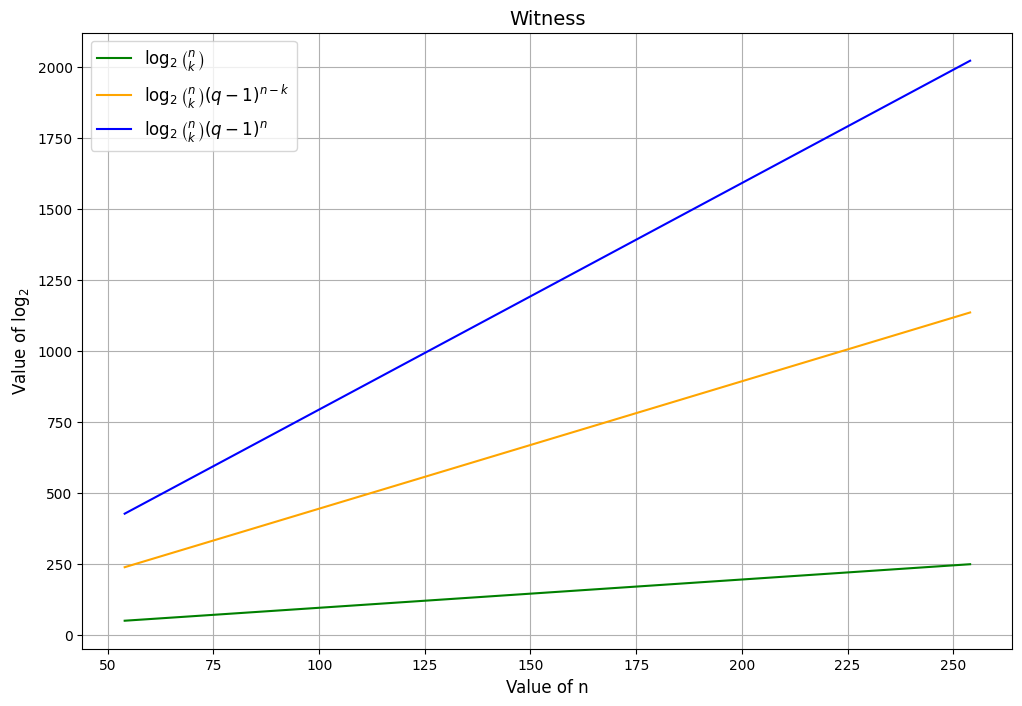

In [13]:
from math import log2
from scipy.special import comb

#Field order
q = 127  
n_values = np.arange(54, 255) 

#Vector for save 
log_1 = []
log_2 = []
log_binom = []
n_used = []

# Calcolo per ogni coppia di (n, k) valida
for n in n_values:
#for k in range(1, min(n + 1, 127)):  # k deve essere tra 1 e min(n, 127)
    if n % 2 == 0:
        k = n/2
        binom_log = log2(comb(n, k, exact=False))
        term_1_log = binom_log + n * log2(q - 1)
        term_2_log = binom_log + (n - k) * log2(q - 1)

        log_binom.append(binom_log)
        log_1.append(term_1_log)
        log_2.append(term_2_log)
        n_used.append(n) 

#Results in array for plot them
log_binom = np.array(log_binom)
log_1 = np.array(log_1)
log_2 = np.array(log_2)
n_used = np.array(n_used)

plt.figure(figsize=(12, 8))
plt.plot(n_used, log_binom, label=r'$\log_2\binom{n}{k}$', color='green')
plt.plot(n_used, log_2, label=r'$\log_2\binom{n}{k}(q-1)^{n-k}$', color='orange')
plt.plot(n_used, log_1, label=r'$\log_2\binom{n}{k}(q-1)^n$', color='blue')


plt.title('Witness', fontsize=14)
plt.xlabel('Value of n', fontsize=12)
plt.ylabel('Value of $\log_2$', fontsize=12)
plt.legend(fontsize=12)

plt.grid(True)
plt.show()

    Round  Duration_w_all_Columns_6  Duration_w_all_Columns_7
0       0                443.819838                411.995544
1       1                442.035649                405.819941
2       2                412.754989                377.651716
3       3                396.041221                368.868878
4       4                423.699125                387.838538
5       5                400.889884                375.030683
6       6                386.380278                349.351112
7       7                405.153547                378.595055
8       8                405.041428                377.874430
9       9                388.480758                357.374287
10     10                396.626707                371.736672
11     11                408.585819                377.605178
12     12                407.927780                373.471963
13     13                389.077105                356.769132
14     14                414.300681                386.367823
15     1

/tmp/ipykernel_3079/2381032637.py:13: RuntimeWarning: divide by zero encountered in log
  complex_curve_file3 = X_all**2 * np.log(X_all)
/tmp/ipykernel_3079/2381032637.py:13: RuntimeWarning: invalid value encountered in multiply
  complex_curve_file3 = X_all**2 * np.log(X_all)
/tmp/ipykernel_3079/2381032637.py:16: RuntimeWarning: divide by zero encountered in log
  log_curve_all = np.log(X_all)


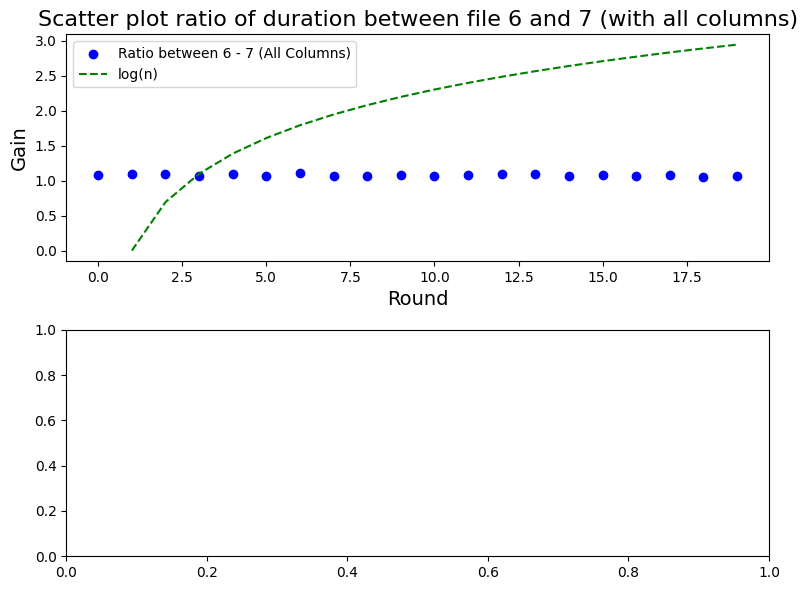

In [14]:
#there compute the mean with max and all columns grouped by round and file. Unstack: breaking down column "#file" into 
#4 columns (mean file 3 all columns.... mean file 4 max columns).
#reset_index returns the "Round" column as a normal column and not as an index
grouped_means = df11.groupby(['Round', 'File'])[['Duration_w_all_Columns']].mean().unstack().reset_index()
grouped_means.columns = ['Round', 'Duration_w_all_Columns_6', 'Duration_w_all_Columns_7']

print(grouped_means)
grouped_means['ratio_6_7_all_columns'] = grouped_means['Duration_w_all_Columns_6']/grouped_means['Duration_w_all_Columns_7']

X_all = grouped_means['Round'].values
y_all = grouped_means['ratio_6_7_all_columns'].values

complex_curve_file3 = X_all**2 * np.log(X_all)
complex_curve_file4 = X_all**2
#complex curve with max columns is similar
log_curve_all = np.log(X_all)

fig, ax = plt.subplots(2, 1, figsize=(8, 6)) 

ax[0].scatter(X_all, y_all, color='b', label='Ratio between 6 - 7 (All Columns)')
ax[0].plot(X_all, log_curve_all, color='g', linestyle='--', label=r'log(n)')
ax[0].set_title('Scatter plot ratio of duration between file 6 and 7 (with all columns)', fontsize=16)
ax[0].set_xlabel('Round', fontsize=14)
ax[0].set_ylabel('Gain', fontsize=14)
ax[0].legend()

plt.tight_layout()
plt.show()

   File    n  Duration_w_all_Columns
0     4  126                2.505386
1     4  190                2.515163
2     4  252                2.964047
3     5  126               40.838012
4     5  190               40.300582
5     5  252               55.584460
6     6  126              384.038540
7     6  190              465.823274
8     6  252              694.675672
   File    n             Durata_Type        Mean
0     4  126  Duration_w_all_Columns    2.505386
1     4  190  Duration_w_all_Columns    2.515163
2     4  252  Duration_w_all_Columns    2.964047
3     5  126  Duration_w_all_Columns   40.838012
4     5  190  Duration_w_all_Columns   40.300582
5     5  252  Duration_w_all_Columns   55.584460
6     6  126  Duration_w_all_Columns  384.038540
7     6  190  Duration_w_all_Columns  465.823274
8     6  252  Duration_w_all_Columns  694.675672
   File    n             Durata_Type      Mean
0     4  126  Duration_w_all_Columns  2.505386
1     4  190  Duration_w_all_Columns  2.515163

/tmp/ipykernel_3079/3279834909.py:34: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(data=grouped_means_melted, x='File', y='Mean', hue='File', ax=axes[0], palette='Set1', ci = None)


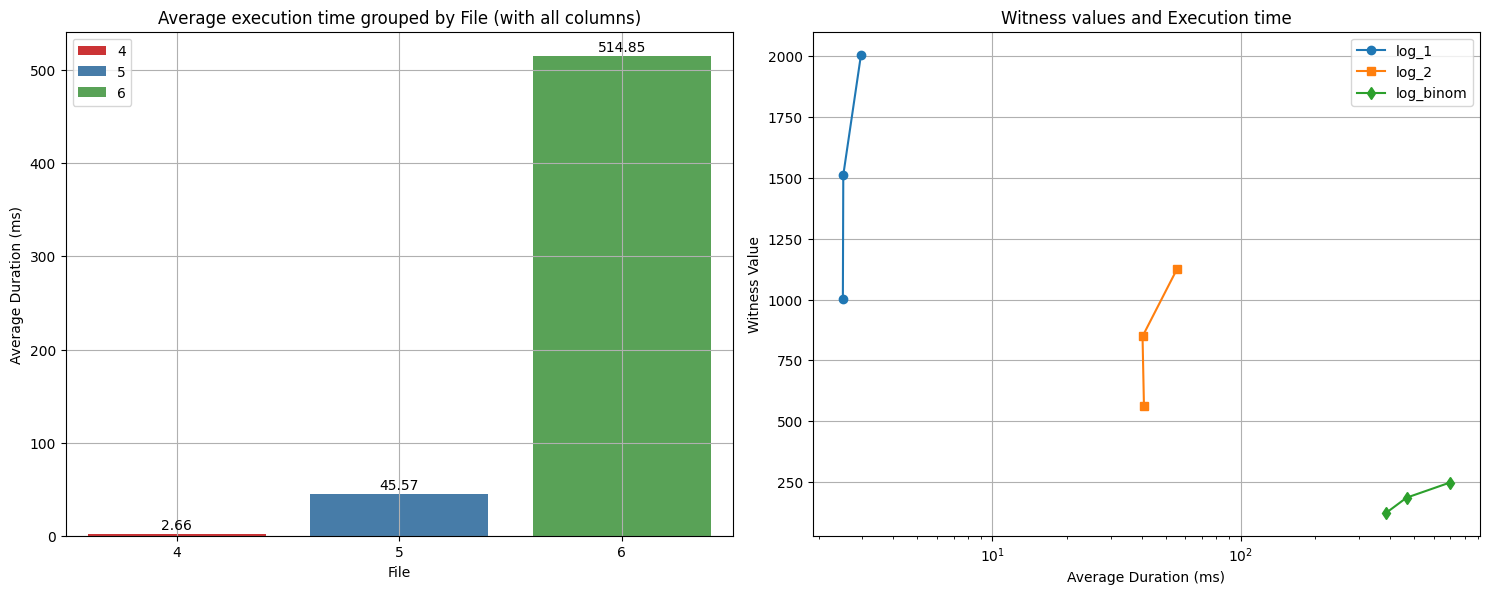

In [21]:
def calculate_witness(n_values, q):
    log_binom, log_1, log_2, n_used = [], [], [], []
    for n in n_values:
        if n % 2 == 0:
            k = n // 2
            binom_log = log2(comb(n, k))
            term_1_log = binom_log + n * log2(q - 1)
            term_2_log = binom_log + (n - k) * log2(q - 1)

            log_binom.append(binom_log)
            log_1.append(term_1_log)
            log_2.append(term_2_log)
            n_used.append(n)
    return n_used, log_binom, log_1, log_2

n_values = df12['n'].unique()
q = 127  
n_used, log_binom, log_1, log_2 = calculate_witness(n_values, q)

grouped = df12.groupby(['File', 'n']).agg({
    'Duration_w_all_Columns': 'mean',
}).reset_index()
grouped_means_melted = grouped.melt(id_vars=['File', 'n'], 
                                          value_vars=['Duration_w_all_Columns'], 
                                          var_name='Durata_Type', value_name='Mean')
print(grouped)
print(grouped_means_melted)
print(grouped_means_melted.iloc[0:3])
print(grouped_means_melted.iloc[3:6])
print(grouped_means_melted.iloc[6:9])

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

ax = sns.barplot(data=grouped_means_melted, x='File', y='Mean', hue='File', ax=axes[0], palette='Set1', ci = None)
axes[0].set_ylabel('Average Duration (ms)')
axes[0].set_xlabel('File')
axes[0].set_title('Average execution time grouped by File (with all columns)')
axes[0].legend()
axes[0].grid()

axes[1].plot(grouped_means_melted['Mean'].iloc[0:3], log_1, 'o-', label='log_1')
axes[1].plot(grouped_means_melted['Mean'].iloc[3:6], log_2, 's-', label='log_2')
axes[1].plot(grouped_means_melted['Mean'].iloc[6:9], log_binom, 'd-', label='log_binom')
axes[1].set_xlabel('Average Duration (ms)')
axes[1].set_ylabel('Witness Value')
axes[1].set_title('Witness values and Execution time')
axes[1].legend()
axes[1].grid()
for p in ax.patches:
    if p.get_height() > 0:
        ax.annotate(format(p.get_height(), '.2f'), 
                        (p.get_x() + p.get_width() / 2., p.get_height()), 
                        ha='center', va='bottom', 
                        fontsize=10, color='black', 
                        xytext=(0, 1), 
                        textcoords='offset points')
plt.tight_layout()
plt.xscale('log')
plt.show()



    File    n  Max_columns  Duration_w_all_Columns  Duration_w_max_columns
0      4  126           11                3.847508                1.365315
1      4  126           12                1.441509                2.136717
2      4  190           11                1.845171                0.946671
3      4  190           12                3.185154                1.043105
4      4  252           11                2.324688                1.705426
5      4  252           12                3.609865                2.423358
6      5  126           11               55.495399               52.797668
7      5  126           12               29.718614               29.207680
8      5  190           11               38.816614               36.860945
9      5  190           12               41.768929               40.861710
10     5  252           11               45.065400               44.612273
11     5  252           12               66.541814               63.938774
12     6  126           1

/tmp/ipykernel_3079/3615297928.py:35: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(data=grouped_means_melted, x='File', y='Mean', hue='File', ax=axes[0], palette='Set1', ci = None)


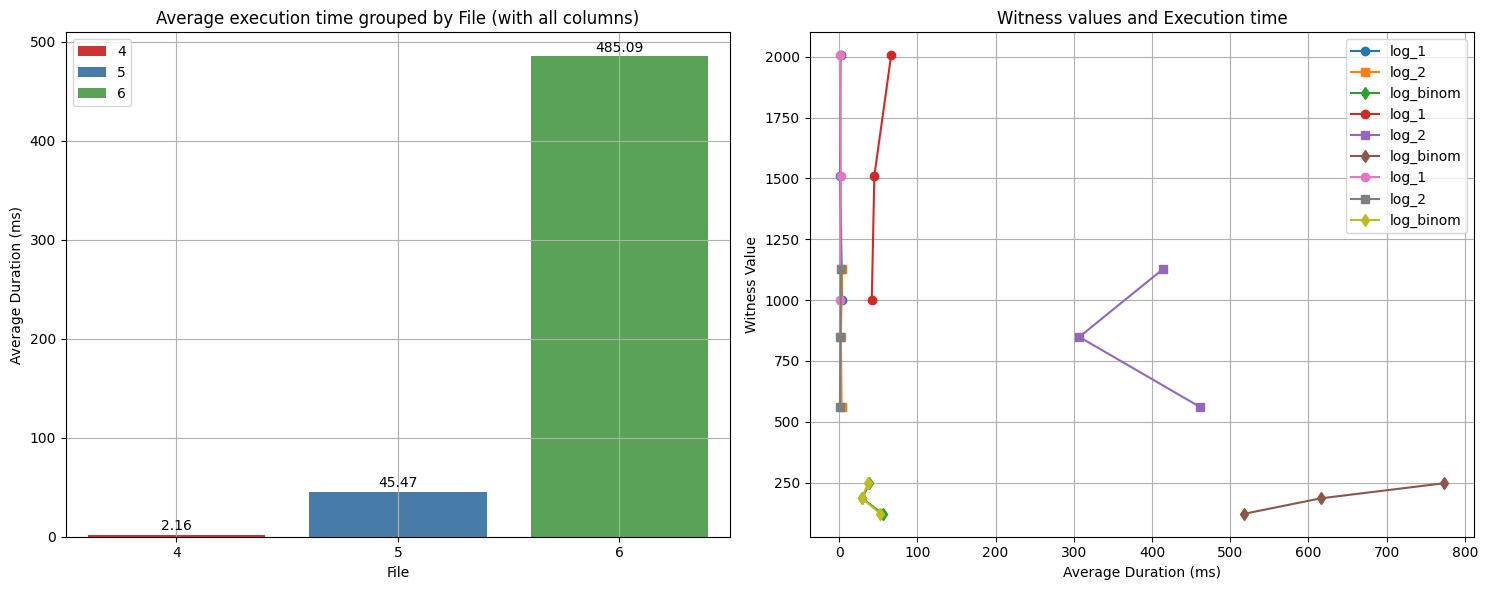

In [17]:
def calculate_witness(n_values, q):
    log_binom, log_1, log_2, n_used = [], [], [], []
    for n in n_values:
        if n % 2 == 0:
            k = n // 2
            binom_log = log2(comb(n, k))
            term_1_log = binom_log + n * log2(q - 1)
            term_2_log = binom_log + (n - k) * log2(q - 1)

            log_binom.append(binom_log)
            log_1.append(term_1_log)
            log_2.append(term_2_log)
            n_used.append(n)
    return n_used, log_binom, log_1, log_2

n_values = df12['n'].unique()
q = 127  
n_used, log_binom, log_1, log_2 = calculate_witness(n_values, q)

grouped = df12.groupby(['File', 'n', 'Max_columns']).agg({
    'Duration_w_all_Columns': 'mean',
    'Duration_w_max_columns': 'mean',
}).reset_index()
grouped_means_melted = grouped.melt(id_vars=['File', 'n', 'Max_columns'], 
                                          value_vars=['Duration_w_all_Columns', 'Duration_w_max_columns'], 
                                          var_name='Durata_Type', value_name='Mean')
print(grouped)
print(grouped_means_melted)
print(grouped_means_melted.iloc[0:6])
print(grouped_means_melted.iloc[6:12])
print(grouped_means_melted.iloc[12:18])

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

ax = sns.barplot(data=grouped_means_melted, x='File', y='Mean', hue='File', ax=axes[0], palette='Set1', ci = None)
axes[0].set_ylabel('Average Duration (ms)')
axes[0].set_xlabel('File')
axes[0].set_title('Average execution time grouped by File (with all columns)')
axes[0].legend()
axes[0].grid()

axes[1].plot(grouped_means_melted['Mean'].iloc[0:3], log_1, 'o-', label='log_1')
axes[1].plot(grouped_means_melted['Mean'].iloc[3:6], log_2, 's-', label='log_2')
axes[1].plot(grouped_means_melted['Mean'].iloc[6:9], log_binom, 'd-', label='log_binom')
axes[1].plot(grouped_means_melted['Mean'].iloc[9:12], log_1, 'o-', label='log_1')
axes[1].plot(grouped_means_melted['Mean'].iloc[12:15], log_2, 's-', label='log_2')
axes[1].plot(grouped_means_melted['Mean'].iloc[15:18], log_binom, 'd-', label='log_binom')
axes[1].plot(grouped_means_melted['Mean'].iloc[18:21], log_1, 'o-', label='log_1')
axes[1].plot(grouped_means_melted['Mean'].iloc[21:24], log_2, 's-', label='log_2')
axes[1].plot(grouped_means_melted['Mean'].iloc[24:27], log_binom, 'd-', label='log_binom')



axes[1].set_xlabel('Average Duration (ms)')
axes[1].set_ylabel('Witness Value')
axes[1].set_title('Witness values and Execution time')
axes[1].legend()
axes[1].grid()
for p in ax.patches:
    if p.get_height() > 0:
        ax.annotate(format(p.get_height(), '.2f'), 
                        (p.get_x() + p.get_width() / 2., p.get_height()), 
                        ha='center', va='bottom', 
                        fontsize=10, color='black', 
                        xytext=(0, 1), 
                        textcoords='offset points')
plt.tight_layout()
plt.show()

